In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing or loading the dataset
pd.set_option('display.max_columns', None) #for displayig all the columns
df = pd.read_csv('global_pp.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database

The database includes the following indicators:

    `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    `country_long` (text): longer form of the country designation
    `name` (text): name or title of the power plant, generally in Romanized form
    `gppd_idnr` (text): 10 or 12 character identifier for the power plant
    `capacity_mw` (number): electrical generating capacity in megawatts
    `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `primary_fuel` (text): energy source used in primary electricity generation or export
    `other_fuel1` (text): energy source used in electricity generation or export
    `other_fuel2` (text): energy source used in electricity generation or export
    `other_fuel3` (text): energy source used in electricity generation or export
     `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    `owner` (text): majority shareholder of the power plant, generally in Romanized form
    `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    `url` (text): web document corresponding to the `source` field
    `geolocation_source` (text): attribution for geolocation information
    `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    `year_of_capacity_data` (number): year the capacity information was reported
    `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    `generation_data_source` (text): attribution for the reported generation information
    `estimated_generation_gwh` (text): label of the model/method used to estimate generation
    
We have to predict 2 outputs:
1) Primary Fuel - categorical (multiclass) type data
2) capacity_mw - Continuous type data

1 classification task and 1 regression task

In [3]:
#Checing of columns name in dataset
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
#Checking for data shape
df.shape

(907, 27)

In [5]:
#Checking data types
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [6]:
#Checking any null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

1) Columns: other_fuel3, generation_gwh_2013, wepp_id, generation_gwh_2019, estimated_generation_gwh has all null values so we can drop these columns

2) Columns: other_fuel1, other_fuel2, owner, generation_data_source has more than half entries as null values, so we can drop these columns

3) Let us combine generation_gwh data from 2014 to 2018 into 1 column and check

In [7]:
df = df.drop(['other_fuel3', 'generation_gwh_2013', 'wepp_id', 'generation_gwh_2019', 'estimated_generation_gwh', 
              'other_fuel1', 'other_fuel2', 'owner', 'generation_data_source'], axis=1)

In [8]:
#Checking any null values
df.isnull().sum()

country                    0
country_long               0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [9]:
#Taking summation of generation_gwh data from 2014 to 2018 into 1 column
df['generation_gwh_upto_2018'] = df['generation_gwh_2014'] + df['generation_gwh_2015'] + df['generation_gwh_2016'] + df['generation_gwh_2017'] + df['generation_gwh_2018']

In [10]:
df = df.drop(['generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016',
              'generation_gwh_2017','generation_gwh_2018'], axis=1)
#Checking any null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
commissioning_year          380
source                        0
url                           0
geolocation_source           19
year_of_capacity_data       388
generation_gwh_upto_2018    516
dtype: int64

'generation_gwh_upto_2018' has more than half entries as null values, so we can drop this column

In [11]:
df = df.drop(['generation_gwh_upto_2018'], axis=1)

Let us set the limit as 30% for missing values, if more than 30% values missing in the column than drop the variable

commissioning_year and year_of_capacity_data has 40% missing values so lets drop them

In [12]:
df = df.drop(['commissioning_year' , 'year_of_capacity_data'], axis=1)
#Checking any null values
df.isnull().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
source                 0
url                    0
geolocation_source    19
dtype: int64

In [13]:
#Handling NaN values
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
#Checking any null values
df.isnull().sum()

country               0
country_long          0
name                  0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
url                   0
geolocation_source    0
dtype: int64

In [14]:
#Checking any blank or white spaces
np.where(df.applymap(lambda x: x == ' '))

(array([], dtype=int64), array([], dtype=int64))

No blank spaces entries present

In [15]:
#Checking if all entries of a column is unique or not
for i in df.columns:
    print('For column of {} :'.format(i),(len(df[i].unique())==len(df[i])))

For column of country : False
For column of country_long : False
For column of name : True
For column of gppd_idnr : True
For column of capacity_mw : False
For column of latitude : False
For column of longitude : False
For column of primary_fuel : False
For column of source : False
For column of url : False
For column of geolocation_source : False


Since gppd_idnr and name are having all unique values, it will be same as index column if we encode and will not help in any kind of predictions 

So we can drop these columns

In [16]:
df = df.drop([ 'gppd_idnr' , 'name'], axis=1)

In [17]:
#Removing duplicate rows if any
print('Size before: ',df.shape)
df.drop_duplicates()
print('Size after: ',df.shape)

Size before:  (907, 9)
Size after:  (907, 9)


In [18]:
#General information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             907 non-null    object 
 1   country_long        907 non-null    object 
 2   capacity_mw         907 non-null    float64
 3   latitude            907 non-null    float64
 4   longitude           907 non-null    float64
 5   primary_fuel        907 non-null    object 
 6   source              907 non-null    object 
 7   url                 907 non-null    object 
 8   geolocation_source  907 non-null    object 
dtypes: float64(3), object(6)
memory usage: 63.9+ KB


In [19]:
#Checking of value counts in each columns having nominal feature columns
for i in df:
    if df[i].dtype == 'object':
        print(df[i].value_counts(),'\n')

IND    907
Name: country, dtype: int64 

India    907
Name: country_long, dtype: int64 

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64 

Central Electricity Authority                519
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Ym Ssk ltd                                     1
Sangam Spinners ltd                            1
Nocil Nocil rubber                             1
Kjs Ahluwalia group                            1
Hare Pvt ltd                                   1
Name: source, Length: 191, dtype: int64 

http://www.cea.nic.in/                                                                                                                           519
http://www.lancosolar.com/

Since country and country_long columns are having only 1 entries as IND, India we can drop these columns as this will not help in predictions

In [20]:
df = df.drop(['country', 'country_long'], axis=1)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,39.2,21.9038,69.3732,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI


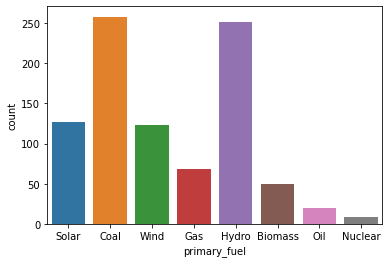

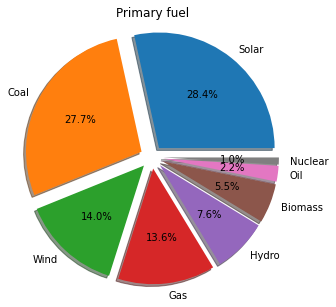

In [21]:
#Checking of value counts primary_fuel
sns.countplot(df['primary_fuel'])
plt.show()

var = 'primary_fuel'
plt.figure(figsize=(5,5))
data = list(df[var].value_counts())
plt.pie(data, labels= ['Solar','Coal','Wind','Gas','Hydro', 'Biomass','Oil', 'Nuclear'], 
        autopct='%1.1f%%', explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], shadow=True)
plt.axis('equal')
plt.title('Primary fuel')
plt.show()

Maximum number of powerplants have Solar energy as primary fuel followed by Coal

Least amongst is Nuclear energy used as primary fuel 

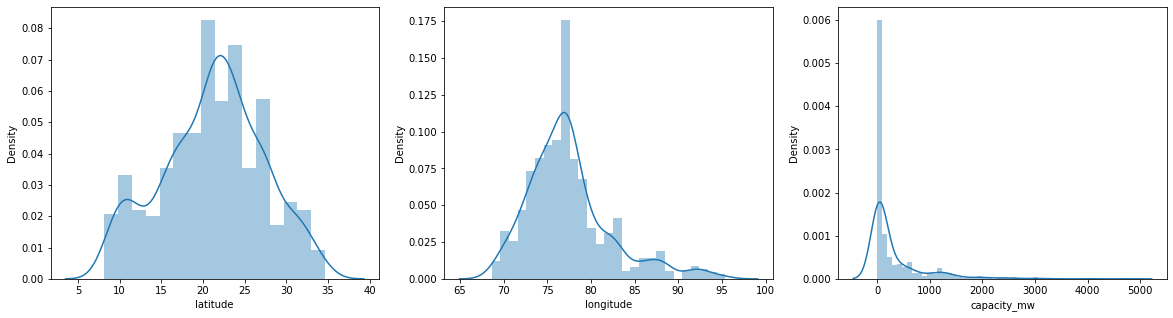

In [22]:
#Checking of distribution of numerical/continuous type of data
plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,1)
sns.distplot(df['latitude'])
ax = plt.subplot(1,3,2)
sns.distplot(df['longitude'])
ax = plt.subplot(1,3,3)
sns.distplot(df['capacity_mw'])
plt.show()

Longitude data is having right skewed distribution

Capacity data is highly right skewed data, density is more between 0 to 100 MW infering most of the powerplants

Latitude data is almost normally distributed

In [23]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'source', 'url',
       'geolocation_source'],
      dtype='object')

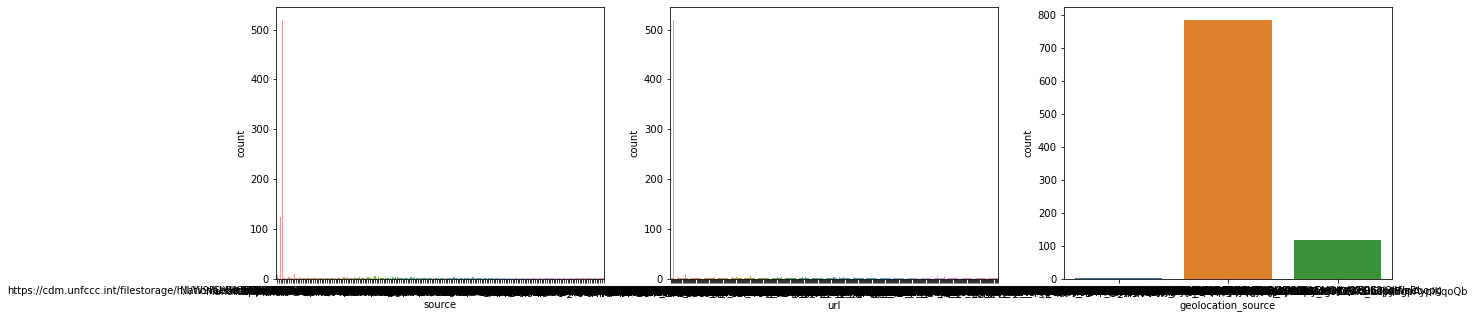

In [24]:
#Checking of value counts of nominal type of data
plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,1)
sns.countplot(df['source'])
ax = plt.subplot(1,3,2)
sns.countplot(df['url'])
ax = plt.subplot(1,3,3)
sns.countplot(df['geolocation_source'])
plt.show()

We can see that source and url data are of nominal type and are highly unbalanced

Nearly 520 entries are same in respective two columns

This will cause problem in model training and significantly hinder the model performance

So let us drop these columns

In [25]:
df = df.drop(['source', 'url'], axis=1)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,WRI
2,39.2,21.9038,69.3732,Wind,WRI
3,135.0,23.8712,91.3602,Gas,WRI
4,1800.0,21.9603,82.4091,Coal,WRI


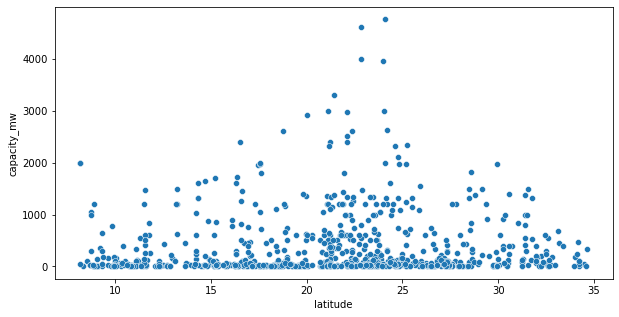

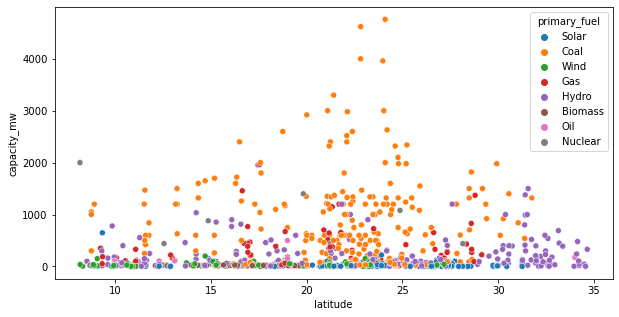

In [26]:
#Capacity of powerplant at different latitude locations
plt.figure(figsize=(10,5))
sns.scatterplot(y = df['capacity_mw'], x = df['latitude'])
plt.show()
plt.figure(figsize=(10,5))
sns.scatterplot(y = df['capacity_mw'], x = df['latitude'], hue = df['primary_fuel'])
plt.show()

We can observe that powerplants with capacity more than 3000 MW are found between latitude 20-25

And also those are of coal based

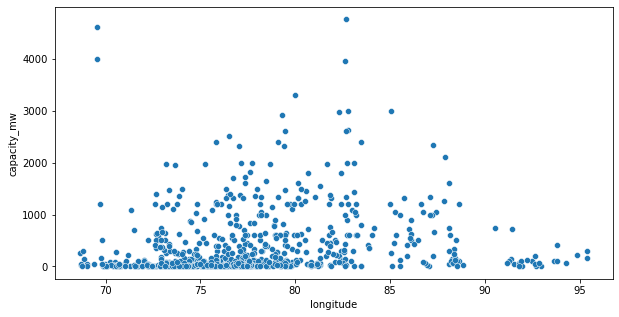

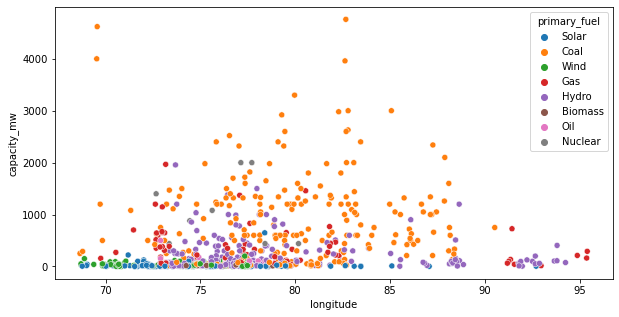

In [27]:
#Capacity of powerplant at different longitude locations
plt.figure(figsize=(10,5))
sns.scatterplot(y = df['capacity_mw'], x = df['longitude'])
plt.show()
plt.figure(figsize=(10,5))
sns.scatterplot(y = df['capacity_mw'], x = df['longitude'], hue = df['primary_fuel'])
plt.show()

We can observe that powerplants with capacity more than 3000 MW are found between longitude 80-85

And also those are of coal based

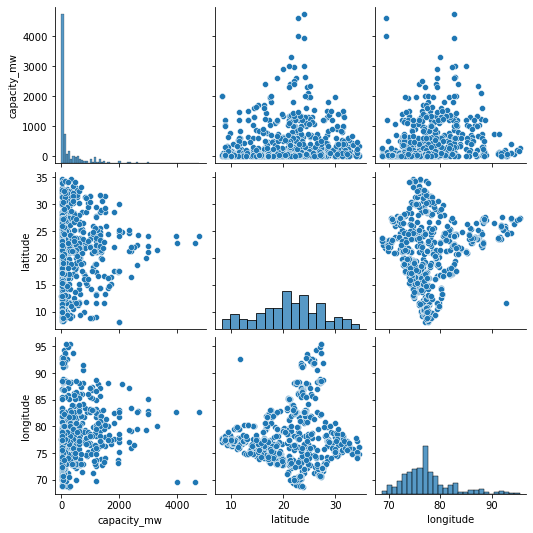

In [28]:
#Plotting all possible bivariate plots together
sns.pairplot(df)
plt.show()

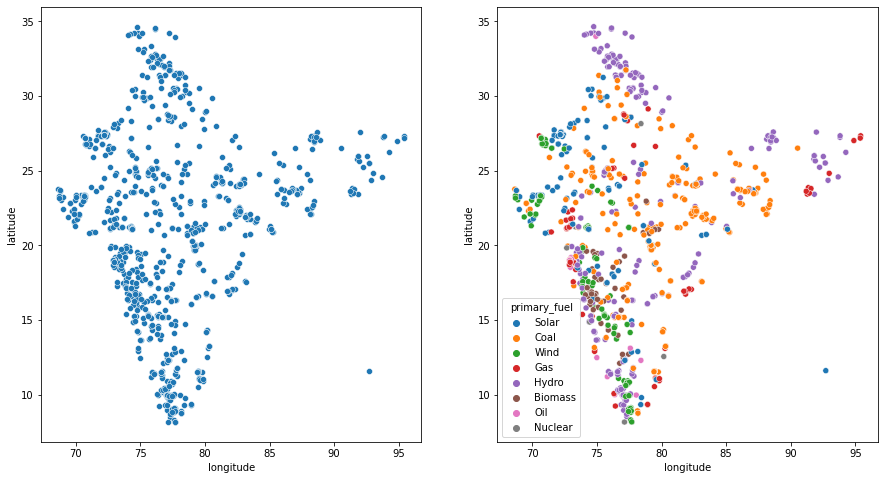

In [29]:
#latitude and longitude location plot
plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1)
sns.scatterplot(x = df['longitude'], y = df['latitude'])
ax = plt.subplot(1,2,2)
sns.scatterplot(y=df['latitude'],x=df['longitude'], hue=df['primary_fuel'])
plt.show()

The above map shows location coordinates of all powerplants

This plot infers that all the locations of powerplant data available is from India

Also we observe that Biomass based powerplants are majorly found in Western ghats region (Maharastra, Karnataka, Kerala) and even in some parts of Madhyapradesh

Coal based ones are found all over India

Hydro based ones in South (western ghats) and south India and Himalayan belt (North and North east) where river and rainfall are more

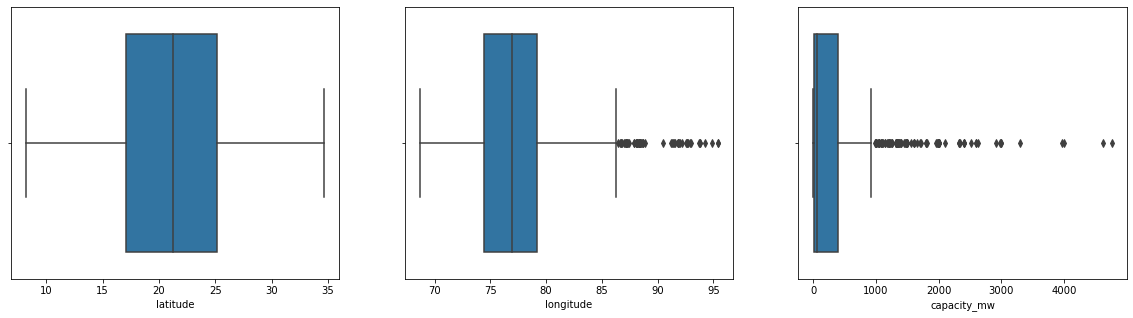

In [30]:
#Checking of outliers in numerical/continuous type of data
plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,1)
sns.boxplot(df['latitude'])
ax = plt.subplot(1,3,2)
sns.boxplot(df['longitude'])
ax = plt.subplot(1,3,3)
sns.boxplot(df['capacity_mw'])
plt.show()

Latitude data is having outliers above 87, which need to be handled

Capacity (Label/target) data is also having outliers

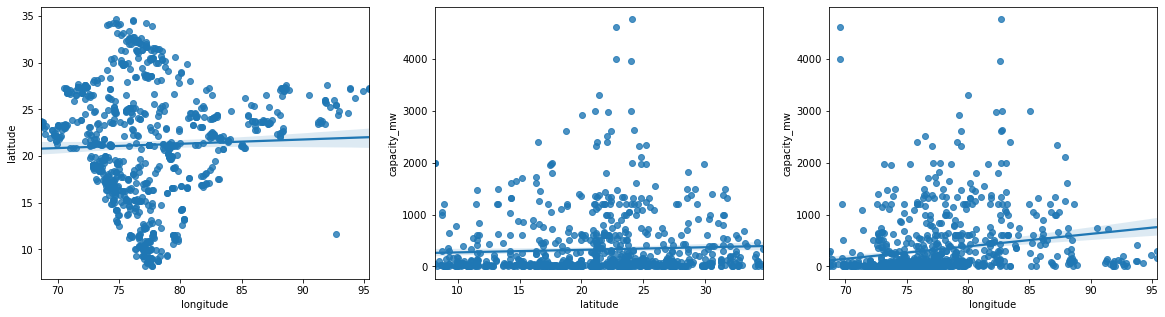

In [31]:
#Vizualization correlation with each other
plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,1)
sns.regplot(y=df['latitude'],x=df['longitude'])
ax = plt.subplot(1,3,2)
sns.regplot(x=df['latitude'],y=df['capacity_mw'])
ax = plt.subplot(1,3,3)
sns.regplot(x=df['longitude'],y=df['capacity_mw'])
plt.show()

No strong correlation observed

In [32]:
#Statistical summary of the data
df.describe()

,capacity_mw,latitude,longitude
count,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907
std,590.085456,6.079148,4.812291
min,0.000000,8.168900,68.644700
25%,16.725000,17.072000,74.388900
50%,59.200000,21.281800,76.979200
75%,385.250000,25.176450,79.206100
max,4760.000000,34.649000,95.408000


In [33]:
#Coefficient of correlation matrix
df.corr()

,capacity_mw,latitude,longitude
capacity_mw,1.000000,0.050984,0.195882
latitude,0.050984,1.000000,0.036362
longitude,0.195882,0.036362,1.000000


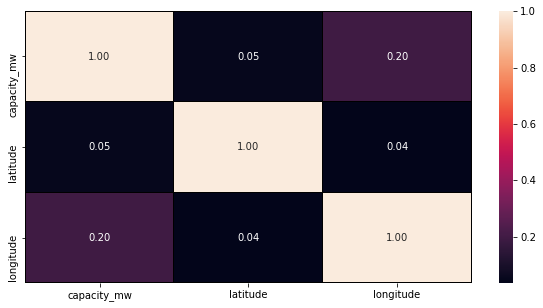

In [34]:
#Heatmap to vizualize correlation between different features
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

In [35]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,WRI
2,39.2,21.9038,69.3732,Wind,WRI
3,135.0,23.8712,91.3602,Gas,WRI
4,1800.0,21.9603,82.4091,Coal,WRI


In [36]:
#Encoding the data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder()
ct = make_column_transformer((ohe, ['geolocation_source', 'primary_fuel']), remainder='passthrough')

transformed = ct.fit_transform(df)
df_new = pd.DataFrame(transformed, columns=ct.get_feature_names())

df_new.head()

,onehotencoder__x0_Industry About,onehotencoder__x0_National Renewable Energy Laboratory,onehotencoder__x0_WRI,onehotencoder__x1_Biomass,onehotencoder__x1_Coal,onehotencoder__x1_Gas,onehotencoder__x1_Hydro,onehotencoder__x1_Nuclear,onehotencoder__x1_Oil,onehotencoder__x1_Solar,onehotencoder__x1_Wind,capacity_mw,latitude,longitude
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.5,28.1839,73.2407
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,24.7663,74.6090
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.2,21.9038,69.3732
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,135.0,23.8712,91.3602
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1800.0,21.9603,82.4091


In [37]:
#Removing of outliers by zscore method (consider only columns which had outliers displayed in boxplot of input features)
#Capacity MW is target variable, so lets not remove its outliers
columns_with_outliers = ['longitude']
print('Shape before',df_new.shape)
from scipy.stats import zscore
z=np.abs(zscore(df_new[columns_with_outliers]))
df_new = df_new[(z<3).all(axis=1)]
print('Shape after',df_new.shape)

Shape before (907, 14)
Shape after (891, 14)


In [38]:
#Percentage loss of data
loss = (df.shape[0]-df_new.shape[0])*100/(df.shape[0])
print(loss,'% loss of data')

1.7640573318632855 % loss of data


In [39]:
#Seperate feature and target columns
x = df_new.drop(columns=['capacity_mw'], axis=1)
y = df_new['capacity_mw']
print('x shape',x.shape)
print('y shape',y.shape)

x shape (891, 13)
y shape (891,)


In [40]:
#VIF method to check multicollinearity 
#Checking for continuous type input feature columns
cont = ['latitude','longitude']
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif = [variance_inflation_factor(x[cont].values,i) for i in range(x[cont].shape[1])]
vif

[12.55055020371768, 12.550550203717698]

VIF value must be within 5, so need to handle the issue by PCA technique

Let us merge Lattitude and longitude into one single column by using PCA technique and finalize the feature selection

In [41]:
#We need to scale the data before applying PCA technique to handle multicollinearity
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_new = sc.fit_transform(x[cont])
x_new = pd.DataFrame(x_new, columns = cont)

#PCA technique to merge
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_new)

array([[-1.46047801,  0.17945115],
       [-0.84092119,  0.00491283],
       [-1.3597953 , -1.17907638],
       ...,
       [ 0.41973984, -0.93958765],
       [-0.93261885, -0.18351407],
       [ 1.34856294, -1.25186351]])

In [42]:
#Combining 2 columns into 1 (latitude+longitude as PC1)
pca = PCA(n_components=1)
new = pca.fit_transform(x_new)
PC = pd.DataFrame(new, columns=['PC1'])

In [43]:
#Using PC inplace of 2 columns
x = pd.concat([x.reset_index(drop=True),PC.reset_index(drop=True)], axis=1)

In [44]:
#Checking skewness of input features
x.skew()

onehotencoder__x0_Industry About                           2.172414
onehotencoder__x0_National Renewable Energy Laboratory    14.849129
onehotencoder__x0_WRI                                     -2.115891
onehotencoder__x1_Biomass                                  3.863897
onehotencoder__x1_Coal                                     0.929505
onehotencoder__x1_Gas                                      3.289804
onehotencoder__x1_Hydro                                    1.041544
onehotencoder__x1_Nuclear                                  9.815011
onehotencoder__x1_Oil                                      6.458588
onehotencoder__x1_Solar                                    2.061660
onehotencoder__x1_Wind                                     2.102126
latitude                                                  -0.121810
longitude                                                  0.879007
PC1                                                       -0.109583
dtype: float64

skewness must be within limit 0f +-0.5

We should not consider skewness of OneHot Encoded categorical data

Look at skewness of PC1, that is within limit

So we can proceed, without skewness handling method

In [45]:
#Apply power transform to transform data
from sklearn.preprocessing import PowerTransformer
po = PowerTransformer()
x = po.fit_transform(x)

In [46]:
#Scaling of input feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [47]:
# Linear regression model
# Selection of best random state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
model = LinearRegression()
max_r2 = 0
for i in range(0,1000):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.20)
    model.fit(xtr,ytr)
    predyt = model.predict(xt)
    r2 = r2_score(yt,predyt)
    
    if r2 > max_r2:
        max_r2 = r2
        print("Max r2 score =",max_r2)
        print("At RS =",i)

Max r2 score = 0.31512255113375853
At RS = 0
Max r2 score = 0.31607153820872036
At RS = 1
Max r2 score = 0.3169023055815362
At RS = 6
Max r2 score = 0.32128971348356083
At RS = 8
Max r2 score = 0.33241588750054607
At RS = 9
Max r2 score = 0.4058995402346326
At RS = 10
Max r2 score = 0.4429443679543781
At RS = 106


In [48]:
#Splitting at best random state
xtr, xt, ytr, yt = train_test_split(x,y, random_state=106,test_size=0.2)

#Training the model 
model = LinearRegression()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.4429443679543781 

Mean absolute error = 242.8144072330115 

Root mean squared error = 372.78879245756144 



In [49]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.26645257183537374
CV score at 5 = 0.24809906612246574
CV score at 6 = 0.2616102448095739
CV score at 7 = 0.26587950687423795
CV score at 8 = 0.2582180587187173
CV score at 9 = 0.26234124035064865
CV score at 10 = 0.2767271699771451
CV score at 11 = 0.27047324992171845

Least difference of CV score and r2 score of testing is : 0.166217197977233


In [50]:
#Saving the results of model
model_result = pd.DataFrame(columns=['Algorithm name','Test r2 score', 'Mean abs error', 'Root mean squared error', 'CV score', 'r2-cv diff'])
model_result.loc[len(model_result.index)] = ['Linear regression', r2_test, mae, rme, cvs, least_diff] 
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score,r2-cv diff
0,Linear regression,0.442944,242.814407,372.788792,0.276727,0.166217


Linear regression model is not giving good results. 

R2 score is very low and r2 - cv score difference is high 17%

Model is overfitting

In [51]:
# Support vector regressor
from sklearn.svm import SVR
model = SVR()
model.fit(xtr,ytr)
predyt = model.predict(xt)
print('Test score in percentage =',(r2_score(yt,predyt)*100),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Root mean squared error =',(np.sqrt(mean_squared_error(yt,predyt))),'\n')

Test score in percentage = -19.852535456818778 

Mean absolute error = 286.4892088571161 

Root mean squared error = 546.8109155168065 



SVR algorithm suits badly for the dataset

In [52]:
# Lasso regression
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.4515749082442635 

Mean absolute error = 239.00600182107297 

Root mean squared error = 369.88968528292844 



In [53]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.2711268575048441
CV score at 5 = 0.265902603849998
CV score at 6 = 0.26382696227452396
CV score at 7 = 0.2689375390274918
CV score at 8 = 0.261009080850155
CV score at 9 = 0.26640881795417315
CV score at 10 = 0.28047731791663877
CV score at 11 = 0.2741752597160725

Least difference of CV score and r2 score of testing is : 0.17109759032762473


In [54]:
#Hyperparameter tuning of Lasso model
from sklearn.model_selection import GridSearchCV
model = Lasso()
parameters = {'alpha':[0.0001,0.001, 0.01,0.1, 1, 10], 
              'random_state':list(range(10,200,10)), 
              'selection':['cyclic', 'random'],
              'tol':[0.0001,0.001,1,10]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

Lasso(alpha=0.0001, random_state=170, selection='random')


In [55]:
#Trainig model as per best parameters
model = Lasso(alpha=0.0001, random_state=170, selection='random', tol=0.001)
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.4429792734323622 

Mean absolute error = 242.54404002112074 

Root mean squared error = 372.77711267722475 



In [56]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.26814877646294105
CV score at 5 = 0.26358681638695264
CV score at 6 = 0.2607588636157287
CV score at 7 = 0.2656996162641064
CV score at 8 = 0.25816216454731
CV score at 9 = 0.26381961858586045
CV score at 10 = 0.2784426619710908
CV score at 11 = 0.271922008547367

Least difference of CV score and r2 score of testing is : 0.1645366114612714


In [57]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Lasso regression', r2_test, mae, rme, cvs, least_diff] 
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score,r2-cv diff
0,Linear regression,0.442944,242.814407,372.788792,0.276727,0.166217
1,Lasso regression,0.442979,242.544040,372.777113,0.278443,0.164537


In [58]:
# Ridge regression
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.445655981919303 

Mean absolute error = 241.3928994767216 

Root mean squared error = 371.880362135653 



In [59]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.2691212088457696
CV score at 5 = 0.26438217917465356
CV score at 6 = 0.2616497850493735
CV score at 7 = 0.266516380526808
CV score at 8 = 0.2589082547568637
CV score at 9 = 0.2645180451830168
CV score at 10 = 0.2790169514991348
CV score at 11 = 0.2725406752871485

Least difference of CV score and r2 score of testing is : 0.1666390304201682


In [60]:
#Hyperparameter tuning of Lasso model
from sklearn.model_selection import GridSearchCV
model = Ridge()
parameters = {'alpha':[0.001, 0.01,0.1, 1, 10], 
              'random_state':list(range(10,200,10)), 
              'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs'],
              'tol':[0.0001,0.001,1,10]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

Ridge(alpha=10, random_state=10, solver='lsqr', tol=0.0001)


In [61]:
#Trainig model as per best parameters
model = Ridge(alpha=10, random_state=10, solver='lsqr', tol=0.0001)
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.4539126617712015 

Mean absolute error = 238.39428864823296 

Root mean squared error = 369.10048508741784 



In [62]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.2721557197161518
CV score at 5 = 0.26708026798929557
CV score at 6 = 0.2647692447931505
CV score at 7 = 0.2695117410679893
CV score at 8 = 0.2617739573152375
CV score at 9 = 0.26715278503769924
CV score at 10 = 0.2810628952830202
CV score at 11 = 0.2749052087432527

Least difference of CV score and r2 score of testing is : 0.1728497664881813


In [63]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Ridge regression', r2_test, mae, rme, cvs, least_diff] 
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score,r2-cv diff
0,Linear regression,0.442944,242.814407,372.788792,0.276727,0.166217
1,Lasso regression,0.442979,242.544040,372.777113,0.278443,0.164537
2,Ridge regression,0.453913,238.394289,369.100485,0.281063,0.172850


In [64]:
# Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.48194424831290716 

Mean absolute error = 237.95598039707133 

Root mean squared error = 359.502415194646 



In [65]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.2571134963613375
CV score at 5 = 0.2912443224315625
CV score at 6 = 0.2424565707609565
CV score at 7 = 0.27222843561746835
CV score at 8 = 0.28166859830409796
CV score at 9 = 0.2717173210332176
CV score at 10 = 0.2625655144699053
CV score at 11 = 0.27514105718256926

Least difference of CV score and r2 score of testing is : 0.19069992588134466


In [67]:
# Hyper parameter tuning of Gradient boosting regressor
parameters = {'criterion':['friedman_mse', 'squared_error', 'mae','mse'],
              'n_estimators':[100,150,200,300], 
              'max_depth' : [4,6,8,10,12],
              'learning_rate' : [0.01,0.1,1],
              'tol' : [0.0001,0.01,1,10]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

GradientBoostingRegressor(criterion='mse', max_depth=8, n_estimators=150)


In [92]:
# Training for best parameter
model = GradientBoostingRegressor(criterion='mse', max_depth=8, n_estimators=150)
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.5205018354831253 

Mean absolute error = 229.96043903023985 

Root mean squared error = 345.86533563882335 



In [93]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.2576785622752205
CV score at 5 = 0.2657873584621931
CV score at 6 = 0.2516842962458901
CV score at 7 = 0.264681822551003
CV score at 8 = 0.2579014912499015
CV score at 9 = 0.25614232129123954
CV score at 10 = 0.26127536446770183
CV score at 11 = 0.2709552623550204

Least difference of CV score and r2 score of testing is : 0.24954657312810496


In [94]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Gradient boosting regressor', r2_test, mae, rme, cvs, least_diff] 
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score,r2-cv diff
0,Linear regression,0.442944,242.814407,372.788792,0.276727,0.166217
1,Lasso regression,0.442979,242.544040,372.777113,0.278443,0.164537
2,Ridge regression,0.453913,238.394289,369.100485,0.281063,0.172850
3,Gradient boosting regressor,0.520502,229.960439,345.865336,0.270955,0.249547


In [95]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.30039122015000075 

Mean absolute error = 242.74867403160434 

Root mean squared error = 417.773788074141 



In [96]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(4,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 4 = 0.21613262217144602
CV score at 5 = 0.2744739583322667
CV score at 6 = 0.23827001593297936
CV score at 7 = 0.21857047557419382
CV score at 8 = 0.27963207462201545
CV score at 9 = 0.23916071751608226
CV score at 10 = 0.2542027150628204
CV score at 11 = 0.23953682488373912

Least difference of CV score and r2 score of testing is : 0.0207591455279853


In [143]:
#Hyper parameter tuning for random forest regressor
model = RandomForestRegressor()
parameters = {'n_estimators':[100,200,300,400,500], 
              'criterion':["squared_error", "absolute_error", "poisson"], 
              'max_depth':[4,6,8,10,12], 
              'max_features' : ["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

RandomForestRegressor(criterion='poisson', max_depth=12, max_features='sqrt',
                      n_estimators=500)


In [144]:
# Training for best parameter
model = RandomForestRegressor(criterion='poisson', max_depth=12, max_features='sqrt', n_estimators=500)
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.529179919689722 

Mean absolute error = 226.36708631977362 

Root mean squared error = 342.7212641084777 



In [146]:
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,12):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(r2_test - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and r2 score of testing is :', least_diff)

CV score at 2 = 0.22742969614303077
CV score at 3 = 0.29596403799745746
CV score at 4 = 0.3252121557843609
CV score at 5 = 0.3408688307107403
CV score at 6 = 0.3192160963828677
CV score at 7 = 0.34187065012484574
CV score at 8 = 0.34441110906212175
CV score at 9 = 0.32328615336726646
CV score at 10 = 0.3342331224238522
CV score at 11 = 0.3431630171170012

Least difference of CV score and r2 score of testing is : 0.18476881062760026


In [147]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Random forest regressor', r2_test, mae, rme, cvs, least_diff] 
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score,r2-cv diff
0,Linear regression,0.442944,242.814407,372.788792,0.276727,0.166217
1,Lasso regression,0.442979,242.544040,372.777113,0.278443,0.164537
2,Ridge regression,0.453913,238.394289,369.100485,0.281063,0.172850
3,Gradient boosting regressor,0.520502,229.960439,345.865336,0.270955,0.249547
4,Random forest regressor,0.529180,226.367086,342.721264,0.344411,0.184769


Difference between R2 score and CV score is almost 0.17 in every model

This overfitting is occuring due to type of dataset provided

Max R2 score achieved using RF regressor, we shall save this model

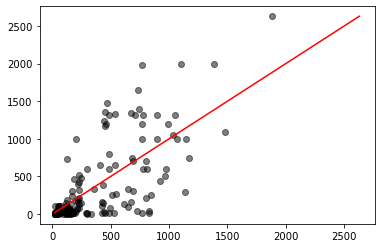

In [148]:
#Predicted data vs actual test data
predyt = model.predict(xt)
actualyt = yt
plt.figure()
plt.scatter(predyt, actualyt, color = 'k', alpha=0.5)
plt.plot([min(predyt),max(actualyt)], [min(predyt),max(actualyt)], 'k-', color = 'r')
plt.show()

In [149]:
#Saving the model
import pickle
filename='GBLPP_reg.pkl'
pickle.dump(model,open(filename,'wb'))

# Classification approach to find primary_fuel

In [150]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,WRI
2,39.2,21.9038,69.3732,Wind,WRI
3,135.0,23.8712,91.3602,Gas,WRI
4,1800.0,21.9603,82.4091,Coal,WRI


In [152]:
#Encoding the data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder()
ct = make_column_transformer((ohe, ['geolocation_source']), remainder='passthrough')

transformed = ct.fit_transform(df)
df_new = pd.DataFrame(transformed, columns=ct.get_feature_names())

df_new.head()

,onehotencoder__x0_Industry About,onehotencoder__x0_National Renewable Energy Laboratory,onehotencoder__x0_WRI,capacity_mw,latitude,longitude,primary_fuel
0,0.0,1.0,0.0,2.5,28.1839,73.2407,Solar
1,0.0,0.0,1.0,98.0,24.7663,74.609,Coal
2,0.0,0.0,1.0,39.2,21.9038,69.3732,Wind
3,0.0,0.0,1.0,135.0,23.8712,91.3602,Gas
4,0.0,0.0,1.0,1800.0,21.9603,82.4091,Coal


In [154]:
#Encoding the label
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df_new['primary_fuel'] = enc.fit_transform(df_new['primary_fuel'].values.reshape(-1,1))

df_new.head()

,onehotencoder__x0_Industry About,onehotencoder__x0_National Renewable Energy Laboratory,onehotencoder__x0_WRI,capacity_mw,latitude,longitude,primary_fuel
0,0.0,1.0,0.0,2.5,28.1839,73.2407,6
1,0.0,0.0,1.0,98.0,24.7663,74.609,1
2,0.0,0.0,1.0,39.2,21.9038,69.3732,7
3,0.0,0.0,1.0,135.0,23.8712,91.3602,2
4,0.0,0.0,1.0,1800.0,21.9603,82.4091,1


In [155]:
#Seperate feature and target columns
x = df_new.drop(columns=['primary_fuel'], axis=1)
y = df_new['primary_fuel']
print('x shape',x.shape)
print('y shape',y.shape)

x shape (907, 6)
y shape (907,)


In [156]:
#Logistic regression
#Best randm state selection
max_acc = 0
max_RS = 0
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
lr = LogisticRegression()
for i in range(0,50):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.2)
    lr.fit(xtr, ytr)
    predyt = lr.predict(xt)
    accuracy = accuracy_score(yt,predyt)  
    if accuracy > max_acc:
        max_acc = accuracy
        max_RS = i
        print('At Max RS',i,'Max Accuracy =',accuracy)

At Max RS 0 Max Accuracy = 0.4725274725274725
At Max RS 3 Max Accuracy = 0.4835164835164835
At Max RS 5 Max Accuracy = 0.521978021978022
At Max RS 9 Max Accuracy = 0.5494505494505495


In [157]:
def metric_score(model, xtr, xt, ytr, yt, train=True):
    if train:
        ypr = model.predict(xtr)
        print(f"Accuracy score of train is : {(accuracy_score(ytr, ypr))*100:.2f}%")
        
    elif train==False:
        ypr = model.predict(xt)
        print(f"Accuracy score of test is : {(accuracy_score(yt, ypr))*100:.2f}%",'\n\nClassification report:')
        print(classification_report(yt, ypr))

In [443]:
#Using best random state for train test split
xtr, xt, ytr, yt = train_test_split(x,y, random_state=9,test_size=0.2)
#Training the model
model = LogisticRegression()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 44.69%
Accuracy score of test is : 54.95% 

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.73      0.74      0.73        54
           2       0.00      0.00      0.00        13
           3       0.38      0.60      0.47        42
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       0.69      0.74      0.71        27
           7       0.45      0.52      0.48        29

    accuracy                           0.55       182
   macro avg       0.28      0.32      0.30       182
weighted avg       0.48      0.55      0.51       182



In [444]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.5494505494505495
CV score at 2 = 0.4641572094018341
CV score at 3 = 0.46748482795299395
CV score at 4 = 0.44981677127597364
CV score at 5 = 0.4597595774391355
CV score at 6 = 0.4608530846985013
CV score at 7 = 0.46526109549365363
CV score at 8 = 0.4608756404285049
CV score at 9 = 0.4574917491749175
CV score at 10 = 0.461965811965812

Least difference of CV score and F1 score of testing is : 0.08196572149755554


In [445]:
#Saving the results of model
model_result = pd.DataFrame(columns=['Algorithm name','Accuracy f1 score test' ,'CV score','F1-CV score diff'])
model_result.loc[len(model_result.index)] = ['Logistic regression', acc, cvs, least_diff] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff
0,Logistic regression,0.549451,0.467485,0.081966


In [446]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 99.59%
Accuracy score of test is : 71.43% 

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.77      0.80      0.78        54
           2       0.58      0.54      0.56        13
           3       0.67      0.69      0.68        42
           4       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         6
           6       0.90      1.00      0.95        27
           7       0.82      0.62      0.71        29

    accuracy                           0.71       182
   macro avg       0.59      0.58      0.58       182
weighted avg       0.72      0.71      0.71       182



In [447]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.7142857142857143
CV score at 2 = 0.6570975678540518
CV score at 3 = 0.689095068447242
CV score at 4 = 0.6858455810689642
CV score at 5 = 0.7012446117418494
CV score at 6 = 0.7067285349134425
CV score at 7 = 0.7034330011074197
CV score at 8 = 0.7001436112404906
CV score at 9 = 0.7088998899889989
CV score at 10 = 0.7067155067155068

Least difference of CV score and F1 score of testing is : 0.0053858242967154135


In [448]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Decision tree classifier', acc, cvs, least_diff] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff
0,Logistic regression,0.549451,0.467485,0.081966
1,Decision tree classifier,0.714286,0.708900,0.005386


In [449]:
#Support vector machine classifier
from sklearn.svm import SVC
model = SVC()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 40.41%
Accuracy score of test is : 41.21% 

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.71      0.72      0.72        54
           2       0.00      0.00      0.00        13
           3       0.28      0.86      0.43        42
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        27
           7       0.00      0.00      0.00        29

    accuracy                           0.41       182
   macro avg       0.12      0.20      0.14       182
weighted avg       0.28      0.41      0.31       182



In [450]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.41208791208791207
CV score at 2 = 0.4046469449874065
CV score at 3 = 0.40575481389198514
CV score at 4 = 0.40464796694086
CV score at 5 = 0.4046809544047113
CV score at 6 = 0.40575258510514695
CV score at 7 = 0.4057841383422779
CV score at 8 = 0.4046828908554572
CV score at 9 = 0.4046534653465346
CV score at 10 = 0.40577533577533575

Least difference of CV score and F1 score of testing is : 0.006303773745634178


In [451]:
# Hyper parameter tuning for svc model
from sklearn.model_selection import GridSearchCV
parameters = {'gamma':['scale', 'auto'],
              'max_iter':[100,150,200],
              'kernel':["linear", "poly", "rbf"],
              'tol':[0.0001,0.001,0.01]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

SVC(gamma='auto', max_iter=100, tol=0.0001)


In [452]:
#Training for best parameters
model = SVC(gamma='auto', max_iter=100, tol=0.0001)
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)

Accuracy score of train is : 93.38%
Accuracy score of test is : 56.04% 

Classification report:
              precision    recall  f1-score   support

           0       0.17      0.12      0.14         8
           1       0.58      0.85      0.69        54
           2       0.00      0.00      0.00        13
           3       0.47      0.64      0.55        42
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       0.81      0.63      0.71        27
           7       0.65      0.38      0.48        29

    accuracy                           0.56       182
   macro avg       0.33      0.33      0.32       182
weighted avg       0.51      0.56      0.52       182



In [453]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.5604395604395604
CV score at 2 = 0.463055887815931
CV score at 3 = 0.4916836054466374
CV score at 4 = 0.5689300612061908
CV score at 5 = 0.5733106672333192
CV score at 6 = 0.5722377134890205
CV score at 7 = 0.5733197035522617
CV score at 8 = 0.5688460642757336
CV score at 9 = 0.5776677667766776
CV score at 10 = 0.5742857142857142

Least difference of CV score and F1 score of testing is : -0.01722820633711719


In [454]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Support vector classifier', acc, cvs, abs(least_diff)] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff
0,Logistic regression,0.549451,0.467485,0.081966
1,Decision tree classifier,0.714286,0.708900,0.005386
2,Support vector classifier,0.560440,0.577668,0.017228


In [455]:
#K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)

Accuracy score of train is : 66.62%
Accuracy score of test is : 53.85% 

Classification report:
              precision    recall  f1-score   support

           0       0.36      0.50      0.42         8
           1       0.62      0.83      0.71        54
           2       0.00      0.00      0.00        13
           3       0.40      0.45      0.42        42
           4       0.00      0.00      0.00         3
           5       1.00      0.17      0.29         6
           6       0.79      0.70      0.75        27
           7       0.50      0.34      0.41        29

    accuracy                           0.54       182
   macro avg       0.46      0.38      0.37       182
weighted avg       0.52      0.54      0.51       182



In [456]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.5384615384615384
CV score at 2 = 0.49284262527836936
CV score at 3 = 0.5292512694978107
CV score at 4 = 0.5325230985146778
CV score at 5 = 0.5281282253657944
CV score at 6 = 0.5281384338329267
CV score at 7 = 0.5413834227787716
CV score at 8 = 0.5458100450240646
CV score at 9 = 0.5567656765676569
CV score at 10 = 0.5534310134310134

Least difference of CV score and F1 score of testing is : -0.018304138106118417


In [457]:
# Hyper parameter tuning for KNN model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_neighbors':range(3,10,1), 
              'weights':['uniform','distance'], 
              'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'leaf_size':[10,15,30,35]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

KNeighborsClassifier(leaf_size=10, n_neighbors=9, weights='distance')


In [458]:
#Training for best parameters
model = KNeighborsClassifier(leaf_size=10, n_neighbors=7, weights='distance')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)

Accuracy score of train is : 99.59%
Accuracy score of test is : 63.19% 

Classification report:
              precision    recall  f1-score   support

           0       0.38      0.38      0.38         8
           1       0.70      0.81      0.75        54
           2       0.36      0.31      0.33        13
           3       0.52      0.55      0.53        42
           4       1.00      0.33      0.50         3
           5       0.50      0.17      0.25         6
           6       0.84      0.78      0.81        27
           7       0.64      0.62      0.63        29

    accuracy                           0.63       182
   macro avg       0.62      0.49      0.52       182
weighted avg       0.63      0.63      0.62       182



In [459]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.6318681318681318
CV score at 2 = 0.5347511937061782
CV score at 3 = 0.565609541086559
CV score at 4 = 0.5677556430548517
CV score at 5 = 0.5699896788294578
CV score at 6 = 0.5634076914139654
CV score at 7 = 0.5722037652270211
CV score at 8 = 0.5766282409563732
CV score at 9 = 0.5875907590759076
CV score at 10 = 0.5887179487179488

Least difference of CV score and F1 score of testing is : 0.04315018315018304


In [460]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['KNN classifier', acc, cvs, least_diff] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff
0,Logistic regression,0.549451,0.467485,0.081966
1,Decision tree classifier,0.714286,0.708900,0.005386
2,Support vector classifier,0.560440,0.577668,0.017228
3,KNN classifier,0.631868,0.588718,0.043150


In [473]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)

Accuracy score of train is : 99.59%
Accuracy score of test is : 78.57% 

Classification report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.79      0.83      0.81        54
           2       0.53      0.69      0.60        13
           3       0.76      0.81      0.78        42
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         6
           6       0.93      1.00      0.96        27
           7       0.88      0.76      0.81        29

    accuracy                           0.79       182
   macro avg       0.69      0.63      0.64       182
weighted avg       0.77      0.79      0.77       182



In [474]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.7857142857142857
CV score at 2 = 0.7133354727659946
CV score at 3 = 0.7332051085903292
CV score at 4 = 0.7255029043701999
CV score at 5 = 0.7365490862728432
CV score at 6 = 0.7221955966074125
CV score at 7 = 0.735428912173098
CV score at 8 = 0.7321359260984319
CV score at 9 = 0.742024202420242
CV score at 10 = 0.7298778998779

Least difference of CV score and F1 score of testing is : 0.04369008329404367


In [475]:
# Hyper parameter tuning for random forest model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators':[200,300,350], 
              'criterion':["gini", "entropy"], 
              'max_depth' :[6, 10, 14], 
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

RandomForestClassifier(max_depth=14, max_features='log2', n_estimators=350)


In [533]:
#Training for best parameters
model = RandomForestClassifier(max_depth=14, max_features='log2', n_estimators=350)
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)

Accuracy score of train is : 99.31%
Accuracy score of test is : 80.22% 

Classification report:
              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.80      0.83      0.82        54
           2       0.53      0.69      0.60        13
           3       0.83      0.81      0.82        42
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         6
           6       1.00      1.00      1.00        27
           7       0.83      0.83      0.83        29

    accuracy                           0.80       182
   macro avg       0.69      0.66      0.65       182
weighted avg       0.79      0.80      0.79       182



In [534]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8021978021978022
CV score at 2 = 0.7034162849724306
CV score at 3 = 0.7321013558309474
CV score at 4 = 0.724425948306109
CV score at 5 = 0.7354501851739421
CV score at 6 = 0.728818113163704
CV score at 7 = 0.7420649118323537
CV score at 8 = 0.7255472752678156
CV score at 9 = 0.7398679867986799
CV score at 10 = 0.7210989010989011

Least difference of CV score and F1 score of testing is : 0.060132890365448555


In [535]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Random forest classifier', acc, cvs, abs(least_diff)] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff
0,Logistic regression,0.549451,0.467485,0.081966
1,Decision tree classifier,0.714286,0.708900,0.005386
2,Support vector classifier,0.560440,0.577668,0.017228
3,KNN classifier,0.631868,0.588718,0.043150
4,Random forest classifier,0.802198,0.742065,0.060133


RFC is giving 80% accuracy but CV - F1 score difference = 0.06

DTC is giving 71.5% accuracy but CV - F1 score difference = 0.005

Therefore we select DTC as best model based on results obtained

In [555]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 99.59%
Accuracy score of test is : 71.98% 

Classification report:
              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.76      0.81      0.79        54
           2       0.50      0.54      0.52        13
           3       0.73      0.64      0.68        42
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         6
           6       0.90      1.00      0.95        27
           7       0.79      0.76      0.77        29

    accuracy                           0.72       182
   macro avg       0.64      0.56      0.58       182
weighted avg       0.72      0.72      0.72       182



In [557]:
table = pd.DataFrame()
table['Actuall primary fuel'] = yt
table['Predicted primary fuel'] = ypr
table.sample(10)

,Actuall primary fuel,Predicted primary fuel
712,3,3
706,3,3
211,7,7
899,1,1
896,7,7
60,3,1
865,3,3
566,3,0
442,7,7
520,0,1


In [558]:
#Saving the model
import pickle
filename='GBLPP_cls.pkl'
pickle.dump(model,open(filename,'wb'))